# Introduction to Numerical Techniques

## 1) Numerical Differentiation Breakout : Different Differences

There are multiple possible ways to calculate the derivative using finite differences:

Left:

$$f'(x) = \frac{f(x+h) - f(x)}{h}$$

Center:

$$f'(x) = \frac{f(x+h/2) - f(x-h/2)}{h}$$

Right:

$$f'(x) = \frac{f(x) - f(x-h)}{h}$$

Code up each of these and plot the accuracy vs step size h. Do this for both $f(x) = -sin(x)exp(-x)$ as well as $f(x) = x^2-x$.

## 2) Numerical Differentiation Breakout : Second Derivative

a) Use wolfram alpha to calculate the second derivative of $f(x) = -sin(x)exp(-x)$.

b) Write a function to calculate the second derivative of a function and compare it to the analytical result. 

(Hint: $f''(x) = \frac{\frac{f(x+h)-f(x)}{h} - \frac{f(x)-f(x-h)}{h} }{h}$ )

c) In ./data/freefall.txt there is data from an experiment with a dropped weight. Calculate the force by measuring the acceleration (i.e. $F = m \frac{d^2x}{dt^2}$)

In [6]:
def second_deriv(fun,x,h):
    f1 = (fun(x+h)-fun(x))/h
    f2 = (fun(x)-fun(x-h))/h
    return (f1 - f2)/h

In [7]:
%pylab inline

def func(x):
    return -np.sin(x)*np.exp(-x)

Populating the interactive namespace from numpy and matplotlib


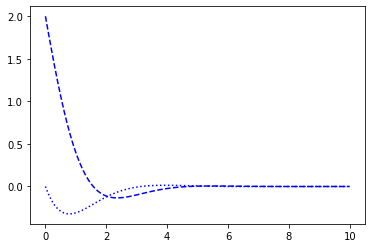

In [13]:
df 
fx = func(x)
plt.plot(x,fx,"b:")
plt.plot(x,second_deriv(func,x,0.01),"b--")

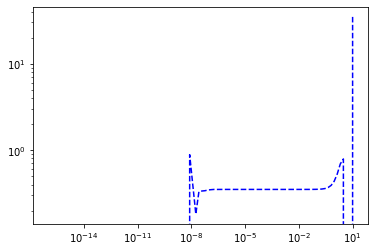

In [16]:
h = np.logspace(-16,1,100)

plt.loglog(h,second_deriv(func,np.pi/3,h),"b--")

## 3) Numerical Integration Breakout: Trap Integration
    
Below is the code for trapezoidal integration. Compare the performance of this vs the rectangular integration in class. 

a) If we want to get within .1 percent of the true integral how many steps of Trap_int will we need vs rectangular int?

b) How long does the integration take for trap_int and rec_int for this precision?

In [27]:
import numpy as np

def trap_int(f, a, b, N=10):
    # Define x-values
    x = np.linspace(a, b, N+1)

    # Get y-values
    y = f(x)

    # Define slice width
    h = (b-a)/float(N)

    # approximate integral
    I = h * (0.5*y[0] + 0.5*y[-1] + sum(y[1:-1]))

    return I

def rec_int(func, a,b,N=10): #functional 
    x = np.linspace(a,b,N)
    dx = x[1]-x[0]
    integral = np.sum(func(x))*dx
    return integral

In [28]:

def func(x):
    return - np.sin(x)*np.exp(-x)

In [31]:
%timeit trap_int(func,0,1)

46.2 µs ± 9.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [33]:
%timeit rec_int(func,0,1, N=1000)

54.8 µs ± 3.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
sol = -0.2458370070002374304636

In [37]:
N = 4

while True:
    fit = trap_int(func,0,1,N=N)
    if abs((fit-sol)/sol)< 0.001: #Convergence Critera
        print(N,(fit-sol)/sol)
        break
    N += 1

20 -0.0009413018499248676


In [38]:
N = 4

while True:
    fit = rec_int(func,0,1,N=N)
    if abs((fit-sol)/sol)< 0.001:
        print(N,(fit-sol)/sol)
        break
    N += 1

631 0.0009984225774362437


In [39]:
%timeit trap_int(func,0,1,N=20)

45.4 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
%timeit rec_int(func,0,1,N=631)

49.6 µs ± 6.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
